### **Name    : Depatla Hemika Reddy**
###**Reg.No : 21BAI1538**

Gmail : depatlahemika.reddy2021@vitstudent.ac.in

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Task 2 : Load the Dataset**

In [136]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [137]:
df.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [138]:
# removing the '.' from the sex colum
df['sex'].replace(".",df.sex.mode()[0],inplace=True)

#**Task 3: Perform the Below Visualisations**

##1)Univariate Analysis

###Histogram

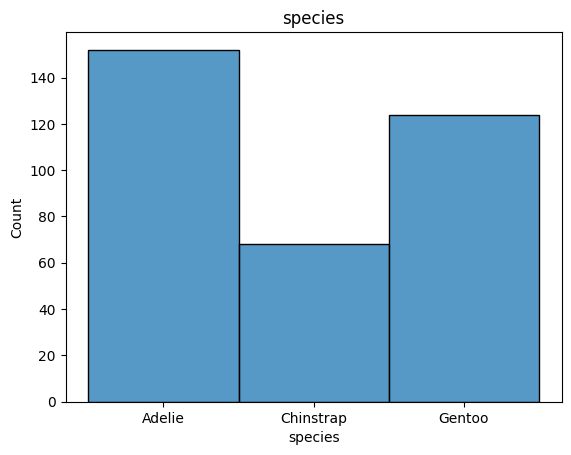

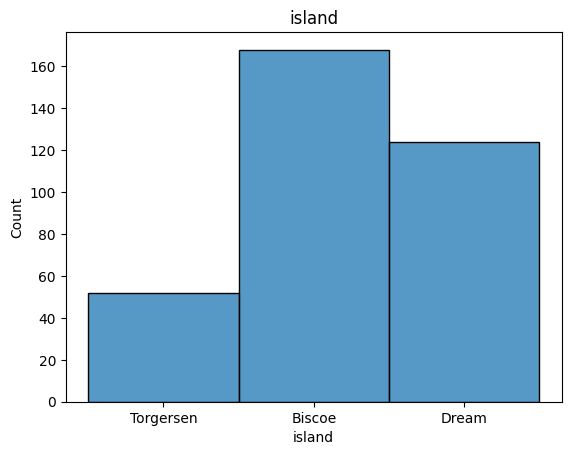

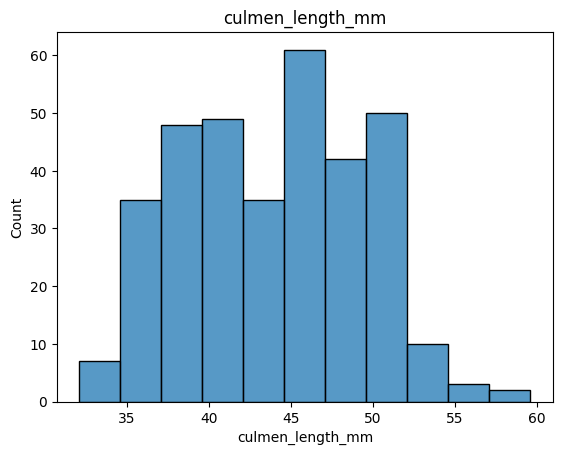

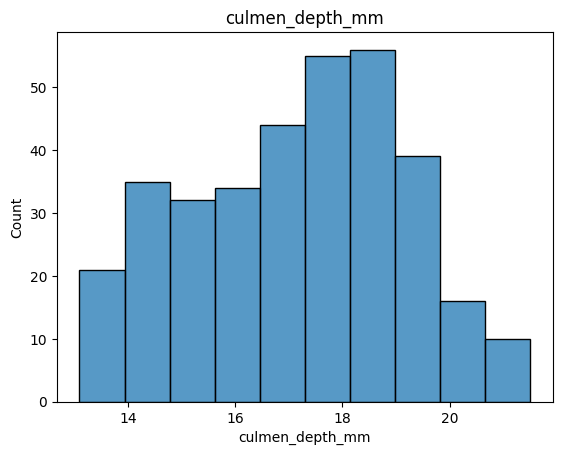

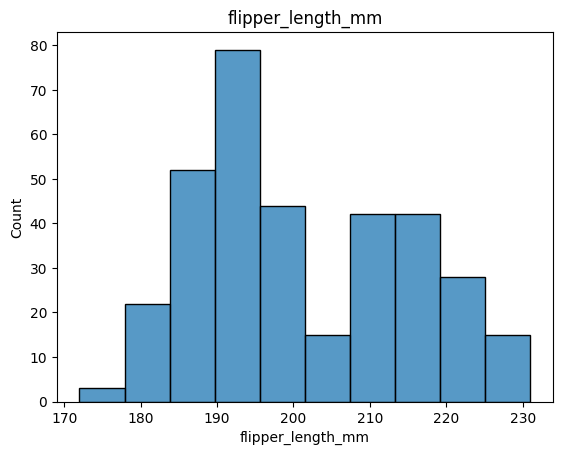

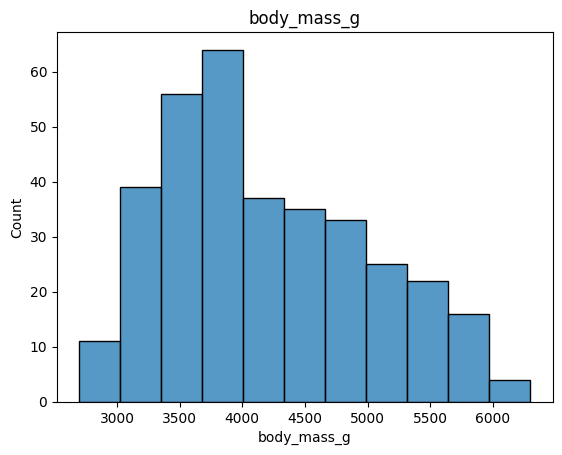

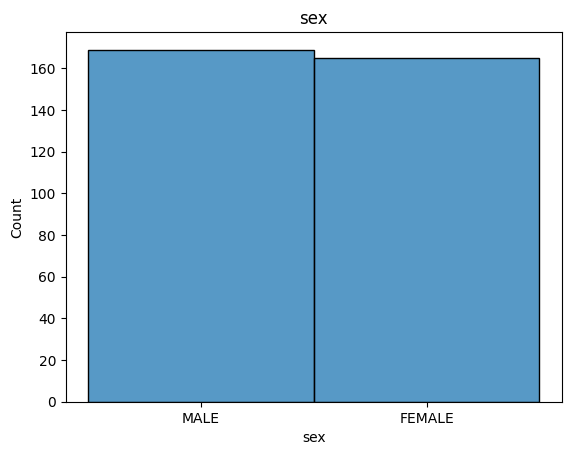

In [139]:
# Here we cannot draw histogram for the sex column as it has many null values(10)
for i in df.columns:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

##Distplot

<ipython-input-140-ce2ae3d92785>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


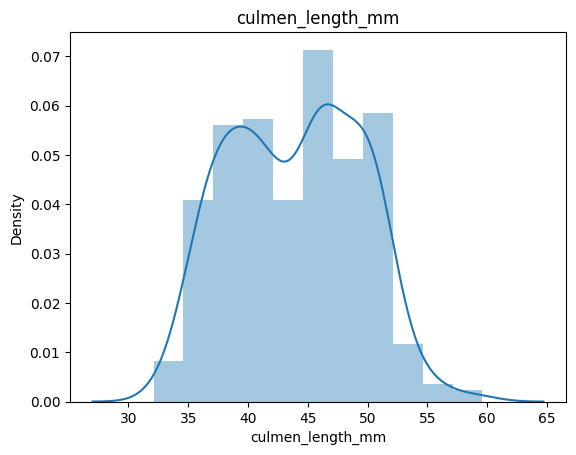

<ipython-input-140-ce2ae3d92785>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


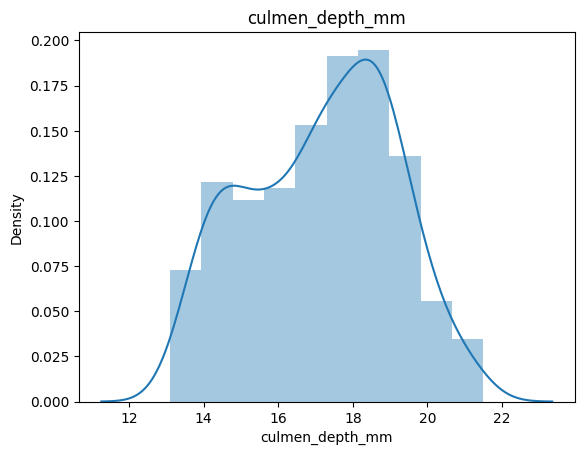

<ipython-input-140-ce2ae3d92785>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


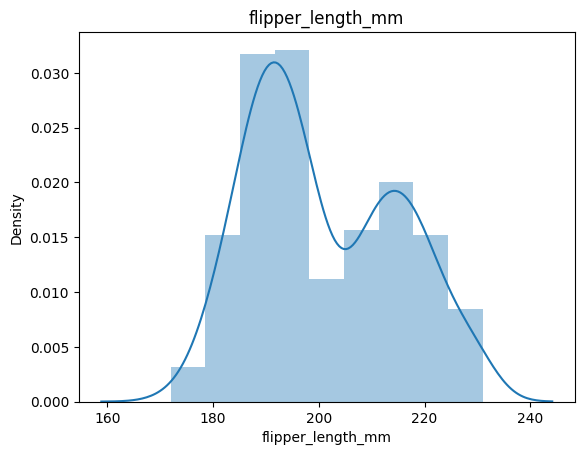

<ipython-input-140-ce2ae3d92785>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


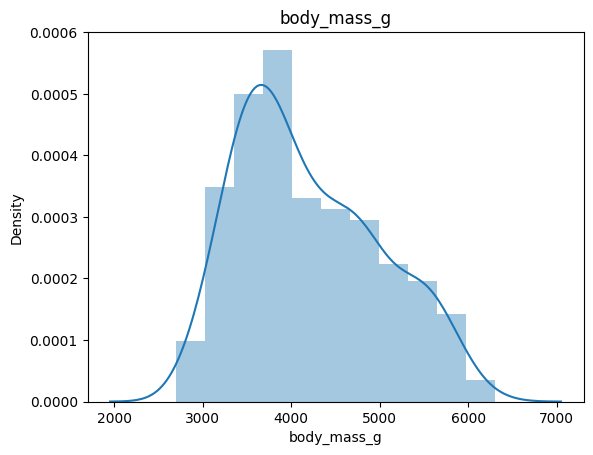

In [140]:
for i in df.columns[2:-1]:
  sns.distplot(df[i])
  plt.title(i)
  plt.show()

###piechart

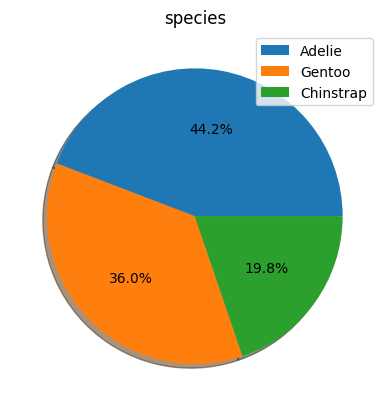

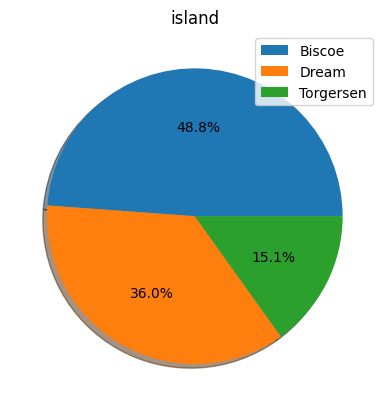

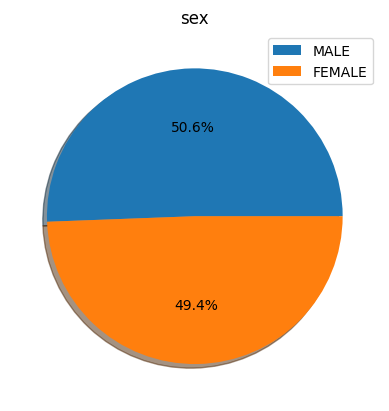

In [141]:
for i in df.columns:
  if df[i].dtype =='object':
    plt.pie(df[i].value_counts(),autopct ='%1.1f%%',shadow = True)
    plt.legend(df[i].value_counts().index)
    plt.title(i)
    plt.show()

##2)Bivariate Analysis

###Count plot

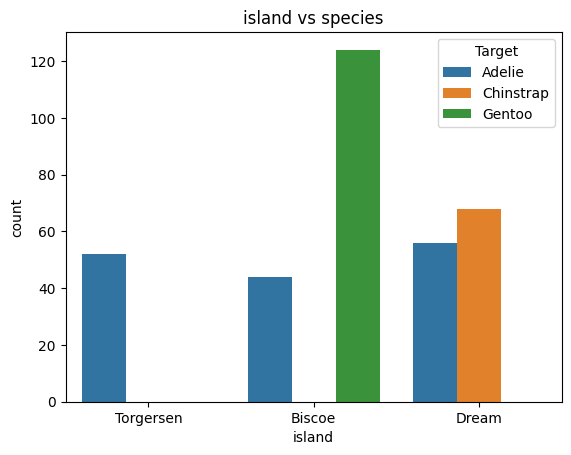

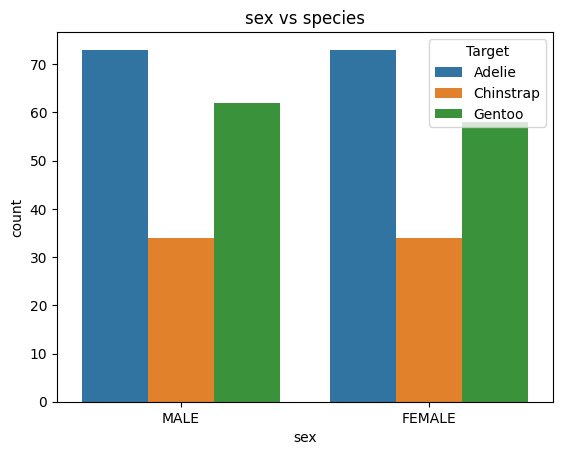

In [142]:
for i in df.columns[1:]:
    if df[i].dtype=='object' :
        sns.countplot(data=df, x=i, hue='species')
        plt.xlabel(i)
        plt.title(f'{i} vs species')
        plt.legend(title='Target')
        plt.show()

###boxplot

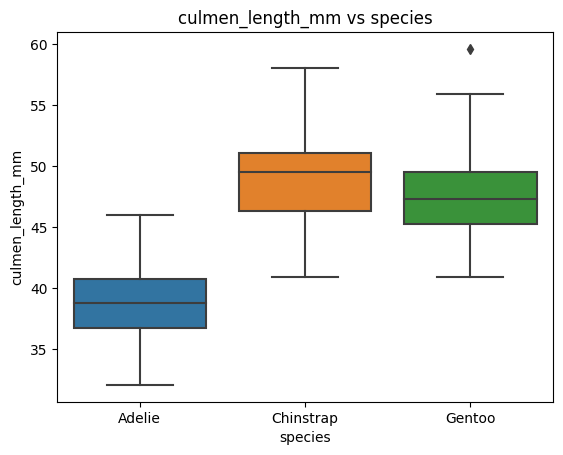

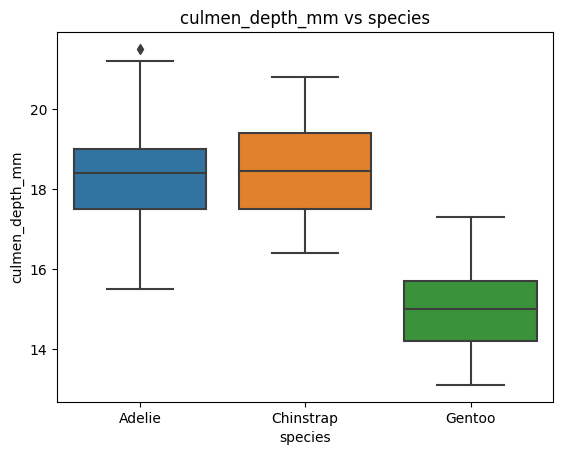

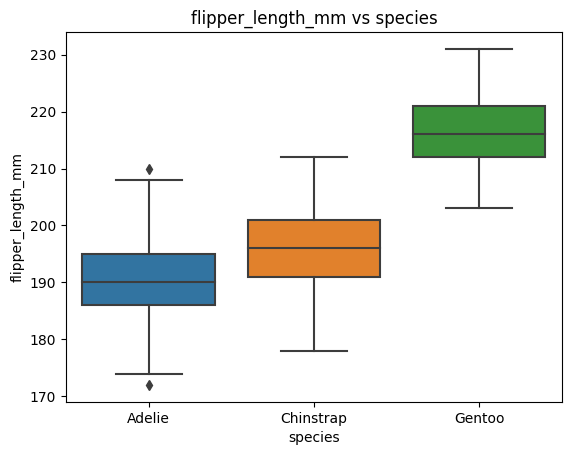

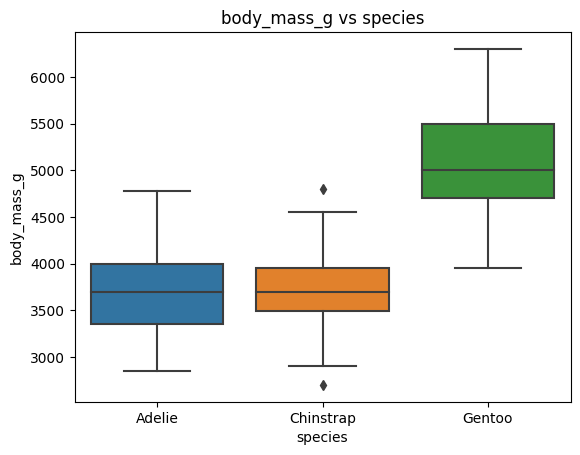

In [143]:
for i in df.columns[2:-1]:
  sns.boxplot(data=df, x='species', y=i)
  plt.ylabel(i)
  plt.title(f'{i} vs species')
  plt.show()

###lineplot

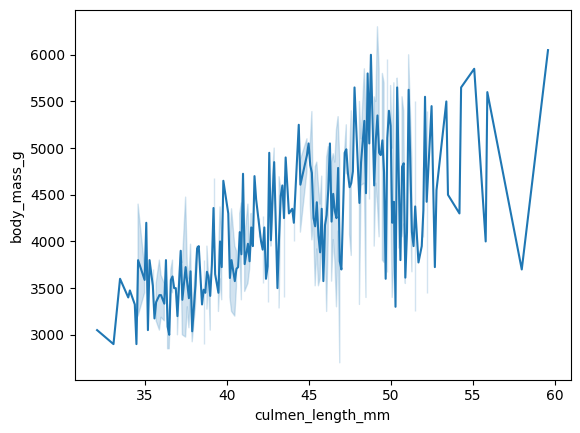

In [144]:
  sns.lineplot(x = df['culmen_length_mm'],y=df['body_mass_g'])
  plt.show()

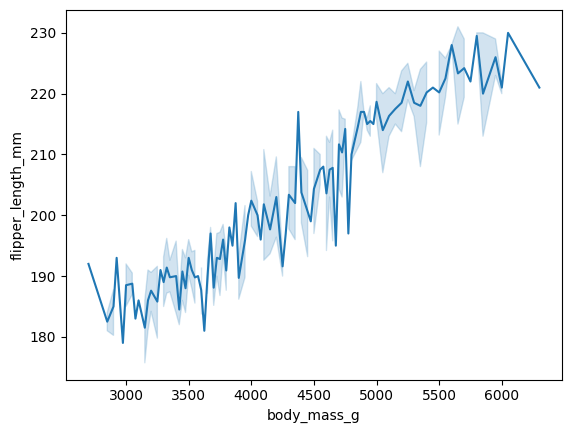

In [145]:
  sns.lineplot(x = df['body_mass_g'],y=df['flipper_length_mm'])
  plt.show()

#3)Multivariate Analysis

pairplot

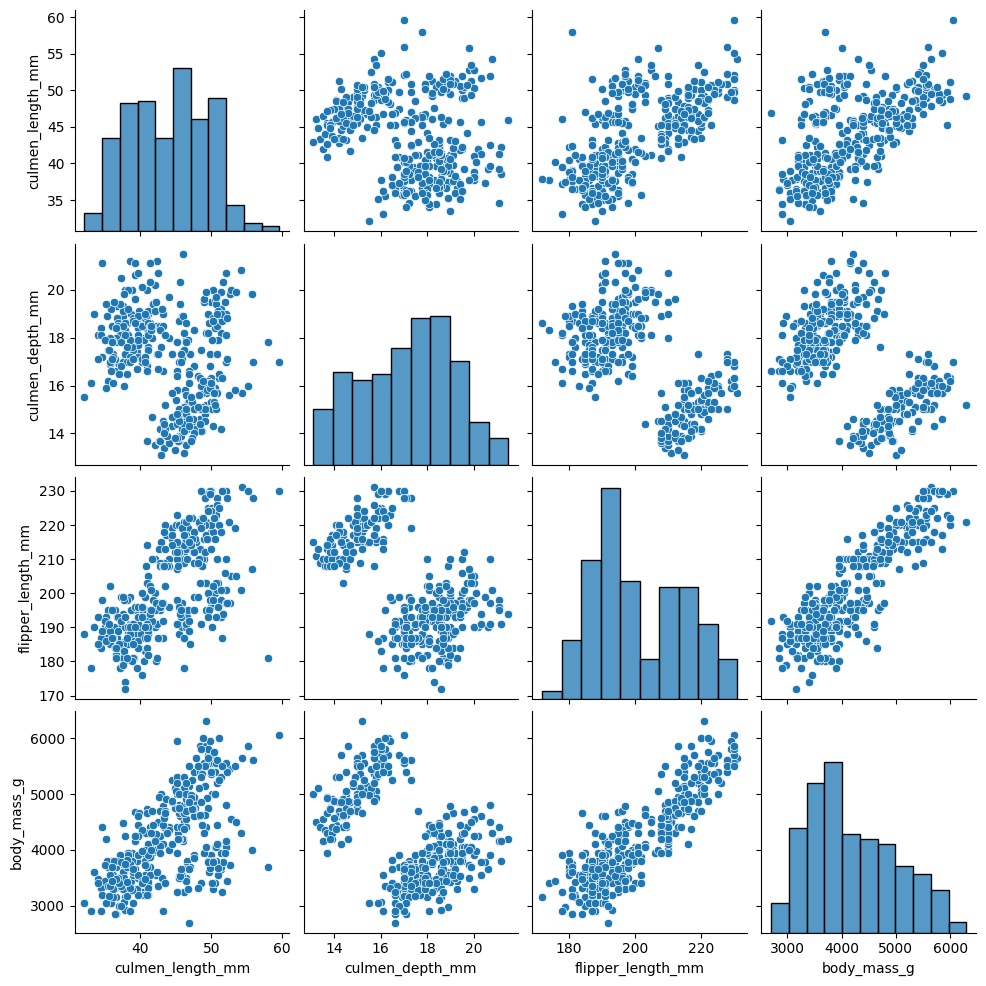

In [146]:
sns.pairplot(df)

###HeatMap

<ipython-input-147-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

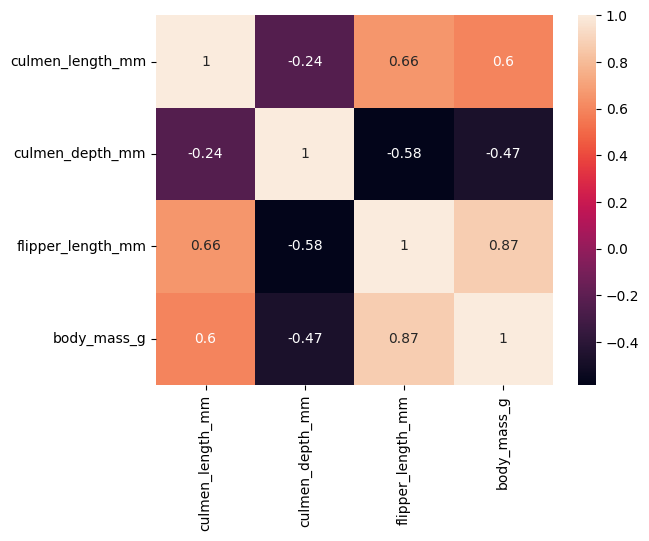

In [147]:
sns.heatmap(df.corr(),annot=True)

#**Task 4: Perform descriptive statistics on the dataset**

In [148]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#**Task 5 : Check for Missing values and deal with them**

In [149]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [150]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [151]:
df.culmen_depth_mm.fillna(df.culmen_depth_mm.mean(),inplace = True)
df.culmen_length_mm.fillna(df.culmen_length_mm.mean(),inplace = True)
df.flipper_length_mm.fillna(df.flipper_length_mm.mean(),inplace = True)
df.body_mass_g.fillna(df.body_mass_g.mean(),inplace = True)
df.sex.fillna(df.sex.mode()[0],inplace = True)

In [152]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#**Task 6 : Find the outliers and replace the outliers**

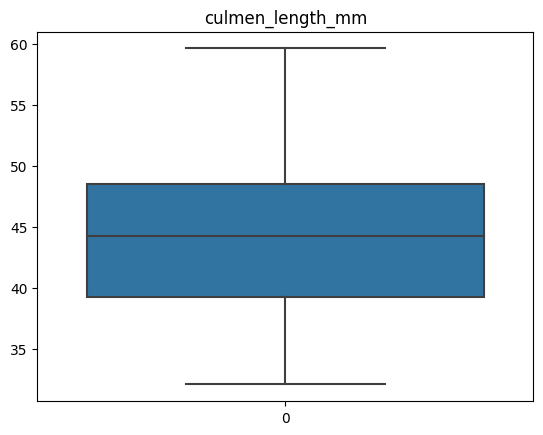

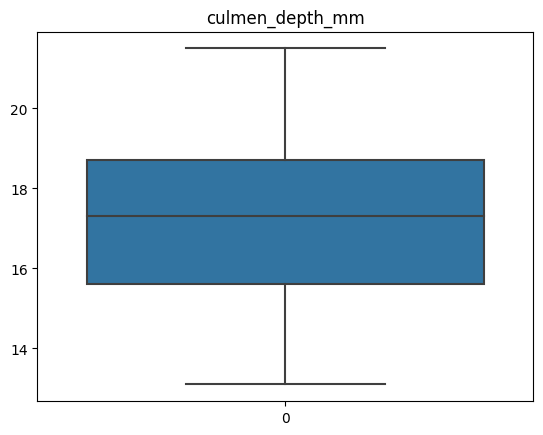

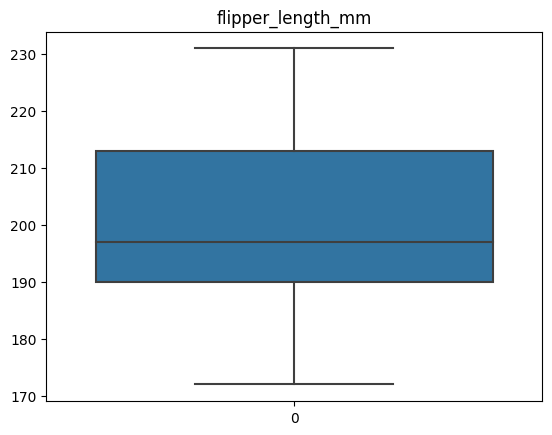

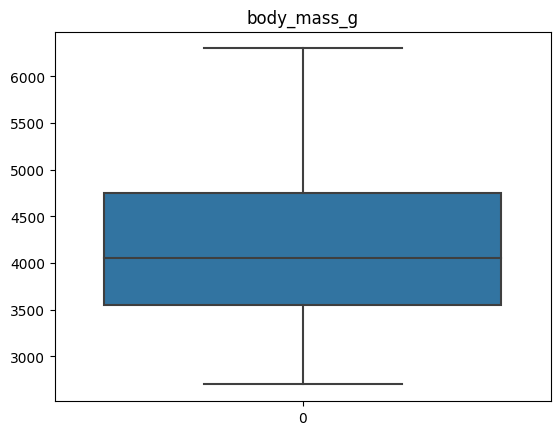

In [153]:
for i in df.columns[2:-1]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()


##There are no outlies in the above columns

In [154]:
#if present how to remove the outliers (we replace the outliers with median of the corresponding column)
for i in df.columns[2:-1]:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[i] = np.where((df[i]>upper_bound) | (df[i]<lower_bound),df[i].median(),df[i])


#**Task 8: Check for Categorical columns and perform encoding.**

In [155]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [156]:
df['sex'] = label.fit_transform(df['sex'])
df['species'] = label.fit_transform(df['species'])
df['island'] = label.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


#**Task 7 : Check the correlation of independent variables with the target**

In [157]:
df.corr()['species'].sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.851160
body_mass_g          0.747726
culmen_length_mm     0.728674
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741335
Name: species, dtype: float64

# **Task 9 : Split the data into dependent and independent variables**

In [158]:
# independent variables
x =df.drop(columns =['species'],axis =1)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0


In [159]:
#dependent variable
y = df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

#**Task 10 : Scaling the data**

In [160]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [161]:
x_scaled= pd.DataFrame(scale.fit_transform(x),columns =x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


#**Task 11: Split the data into training and testing**

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

#**Task  12 : check the training and testing data shape**

In [163]:
print("X_train - ", X_train.shape)
print("X_test  - ", X_test.shape)

X_train -  (240, 6)
X_test  -  (104, 6)


In [164]:
print("y_train -", y_train.shape)
print("y_train - ", y_test.shape)


y_train - (240,)
y_train -  (104,)
